# <center > Load Data </center>

In [130]:
conda install -c conda-forge imbalanced-learn

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.1               |   py38h50d1736_0         3.1 MB  conda-forge
    imbalanced-learn-0.7.0     |             py_1          97 KB  conda-forge
    python_abi-3.8             |           1_cp38           4 KB  conda-forge
    ------------------------------------------------------------
                                           To

In [126]:
pip install delayed

     |████████████████████████████████| 72 kB 895 kB/s eta 0:00:01
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1019]:
conda install xgboost

Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0           8 KB
    conda-4.10.1               |   py38hecd8cb5_1         2.9 MB
    libxgboost-1.3.3           |       h23ab428_0         1.2 MB
    py-xgboost-1.3.3           |   py38hecd8cb5_0         136 KB
    xgboost-1.3.3              |   py38hecd8cb5_0          23 KB
    ------------------------------------------------------------
                                           Total:         4.2 MB

The following NEW packages will be INSTALLED:

  _py-xgboost-mutex  pkgs/main/osx-64::_py-xgboost-mutex-2.0-cpu_0
  libxgboost         pkgs/main/osx-64::libxgboost-1.3.3-h23ab428_0
  py-xgboost         pkgs/main/osx-64::py-xgboost-1.3.3-py38hecd8cb5_0
  xgboost           

In [1021]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pylab as plt
import pandas as pd
import numpy as np

In [1022]:
from sklearn.preprocessing import OneHotEncoder

In [1023]:
train_df =  pd.read_csv('train.csv', sep=',', engine='python')

In [1024]:
#train_df

In [1025]:
#train_df.describe()

#### Input test

In [1026]:
df_test = pd.read_csv('test.csv')
df_test['Weather'] = np.zeros((len(df_test),))

#### Merge

In [1045]:
train_end_id = len(train_df)
df = pd.concat([train_df, df_test ], sort=False)

In [1046]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['Date']=df['Date'].fillna("0")
df['Date']=df['Date'].apply(lambda x: float(x.replace("/","")))

df = df.drop(columns = ['Loc','DayWindDir','NightWindDir'])
#df['Loc'] = df['Loc'].astype(str)
df['WindDir']= df['WindDir'].astype(str)
#df['DayWindDir'] = df['DayWindDir'].astype(str)
#df['NightWindDir'] = df['NightWindDir'].astype(str)

#df['Loc'] = labelencoder.fit_transform(df['Loc'])
#df['WindDir'] = labelencoder.fit_transform(df['WindDir'])
#df['DayWindDir'] = labelencoder.fit_transform(df['DayWindDir'])
#df['NightWindDir'] = labelencoder.fit_transform(df['NightWindDir'])

In [1047]:
#df.dtypes

#### One-hot encoder

In [1048]:
##for cat_feature in ['WindDir','DayWindDir','NightWindDir']: #without 'Loc' ~
df_preprocessed = pd.get_dummies(df)
df_preprocessed.head()

,Date,TempLow,TempHigh,Steaming,Sun,WindSpeed,DayWindSpeed,NightWindSpeed,DayHumidity,NightHumidity,...,WindDir_NW,WindDir_S,WindDir_SE,WindDir_SSE,WindDir_SSW,WindDir_SW,WindDir_W,WindDir_WNW,WindDir_WSW,WindDir_nan
0,2016719.0,19.5,NaN,5.69496,0.500000,61.0,31.0,22.0,86.641375,41.810006,...,0,0,0,0,0,0,0,0,0,0
1,2010726.0,2.1,15.7,NaN,5.700000,26.0,9.0,7.0,53.275715,76.598048,...,0,0,0,0,0,0,0,0,0,0
2,201442.0,20.9,36.1,5.69496,NaN,39.0,31.0,17.0,15.471574,52.163254,...,0,1,0,0,0,0,0,0,0,0
3,20141119.0,11.5,23.9,5.69496,7.993227,35.0,7.0,17.0,46.442398,67.664733,...,0,0,0,0,0,0,0,0,0,0
4,0.0,8.2,20.5,3.20000,NaN,69.0,NaN,NaN,51.830889,51.770240,...,0,0,0,0,0,0,0,0,0,0


In [1049]:
##df_preprocessed.columns.tolist()

In [1050]:
df_preprocessed = df_preprocessed.fillna(df_preprocessed.mean())

## Plot

In [485]:
color = {0:'b',  1:'r'}

In [486]:
df_plot = df.copy()

In [487]:
df_plot['color']=df_plot['Weather'].map(color)

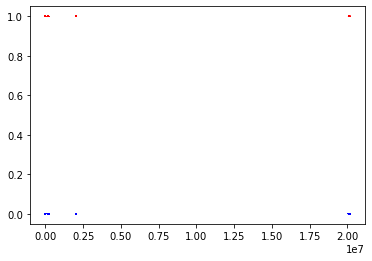

In [488]:
plt.scatter(df_plot['Date'],df_plot['Weather'],c=df_plot['color'],s=0.2,alpha=0.05)

In [489]:
df.dtypes

Date              float64
Loc                 int64
TempLow           float64
TempHigh          float64
Steaming          float64
Sun               float64
WindDir             int64
WindSpeed         float64
DayWindDir          int64
NightWindDir        int64
DayWindSpeed      float64
NightWindSpeed    float64
DayHumidity       float64
NightHumidity     float64
DayPressure       float64
NightPressure     float64
DayCloud          float64
NightCloud        float64
DayTemp           float64
NightTemp         float64
Weather           float64
RISK_MM           float64
dtype: object

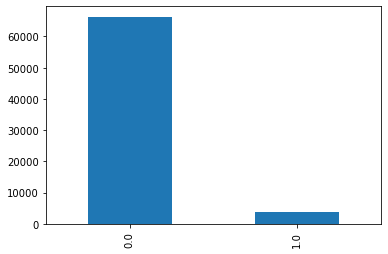

In [490]:
ax = df['Weather'].value_counts().plot(kind='bar',)

## Feature Selection

In [643]:
import seaborn as sns

In [644]:
corrmat = df_preprocessed.corr()

In [658]:
df_preprocessed.head()

,Date,TempLow,TempHigh,Steaming,Sun,WindSpeed,DayWindSpeed,NightWindSpeed,DayHumidity,NightHumidity,...,NightWindDir_NW,NightWindDir_S,NightWindDir_SE,NightWindDir_SSE,NightWindDir_SSW,NightWindDir_SW,NightWindDir_W,NightWindDir_WNW,NightWindDir_WSW,NightWindDir_nan
0,2016719.0,19.5,23.741634,5.694960,0.500000,61.0,31.000000,22.000000,86.641375,41.810006,...,0,0,0,0,0,0,0,0,0,0
1,2010726.0,2.1,15.700000,5.701668,5.700000,26.0,9.000000,7.000000,53.275715,76.598048,...,0,0,1,0,0,0,0,0,0,0
2,201442.0,20.9,36.100000,5.694960,8.003251,39.0,31.000000,17.000000,15.471574,52.163254,...,0,0,0,0,0,1,0,0,0,0
3,20141119.0,11.5,23.900000,5.694960,7.993227,35.0,7.000000,17.000000,46.442398,67.664733,...,0,0,0,0,0,0,0,0,0,1
4,0.0,8.2,20.500000,3.200000,8.003251,69.0,13.739091,18.424823,51.830889,51.770240,...,0,0,0,0,0,0,0,1,0,0


In [645]:
top_corr_features = corrmat.index

In [676]:
g=plt.figure(figsize=(100,100))

<Figure size 7200x7200 with 0 Axes>

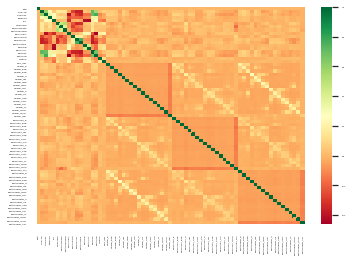

In [685]:
sns.set(font_scale=0.2)
g=sns.heatmap(df_preprocessed[top_corr_features].corr(),annot=False,cmap="RdYlGn")

In [686]:
figure = g.get_figure()    
figure.savefig('g.png', dpi=400)

#### Drop

In [1032]:
#df_preprocessed = df_preprocessed.drop(columns = ['DayHumidity'])

#### Merge test and train for preprocessing

#### Drop some columns & Inputation

In [1033]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Loc'] = df['Loc'].astype(str)
df['WindDir']= df['WindDir'].astype(str)
df['DayWindDir'] = df['DayWindDir'].astype(str)
df['NightWindDir'] = df['NightWindDir'].astype(str)

df['Loc'] = labelencoder.fit_transform(df['Loc'])
df['WindDir'] = labelencoder.fit_transform(df['WindDir'])
df['DayWindDir'] = labelencoder.fit_transform(df['DayWindDir'])
df['NightWindDir'] = labelencoder.fit_transform(df['NightWindDir'])

KeyError: 'Loc'

In [162]:
df = df.drop(columns = [col for col in df.columns if df[col].dtype == np.object])
df = df.drop(columns=['WindDir','DayWindDir','NightWindDir'])
# drop
df = df.fillna(df.mean())

#### Split data

In [1051]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(df_preprocessed.drop(columns = ['Weather']).values[:train_end_id, :],df_preprocessed['Weather'].values[:train_end_id], test_size=0.25)

In [1052]:
x_test = df_preprocessed.drop(columns = ['Weather']).values[train_end_id:, :]

In [1053]:
#df_preprocessed.dtypes.tolist()

#### Standariz3

In [1054]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

In [1055]:
x_val_std = sc.transform(x_val)

In [1056]:
from imblearn.over_sampling import SMOTE
sampler = SMOTE(random_state=42)
x_train_std, y_train = sampler.fit_resample(x_train_std, y_train)

In [809]:
##x_test = df.drop(columns = ['Weather']).values[train_end_id:,:]

## Baseline method

In [587]:
model = DecisionTreeClassifier(max_depth=6)
model.fit(x_train_std,y_train)

DecisionTreeClassifier(max_depth=6)

In [588]:
y_pred_deci = model.predict(x_val_std)

In [589]:
print('Accuracy: %f' % accuracy_score(y_val, y_pred_deci))
print('f1-score: %f' % f1_score(y_val, y_pred_deci))

Accuracy: 0.772784
f1-score: 0.330988


## Craete Ans 

In [591]:
ans_pred = model.predict(x_test_std)
df_sap = pd.DataFrame(ans_pred.astype(int), columns = ['Weather'])
df_sap.to_csv('myAns.csv',  index_label = 'Id')

## Random forest

In [1057]:
from sklearn.ensemble import RandomForestClassifier

In [1062]:
forest = RandomForestClassifier(n_estimators=100,random_state=9,max_depth=10,n_jobs=4)

In [1063]:
forest.fit(x_train_std,y_train)

RandomForestClassifier(max_depth=10, n_jobs=4, random_state=9)

In [1064]:
y_pred_forest = forest.predict(x_val_std)

In [1065]:
print('Accuracy: %f' % accuracy_score(y_val, y_pred_forest))
print('f1-score: %f' % f1_score(y_val, y_pred_forest))

Accuracy: 0.833428
f1-score: 0.414400


## Craete Ans 

In [1066]:
ans_pred = forest.predict(x_test_std)
df_sap = pd.DataFrame(ans_pred.astype(int), columns = ['Weather'])
df_sap.to_csv('RF_n_e_100_max_10_f2.csv',  index_label = 'Id')

## XGBoost(Strong?)

In [1020]:
from xgboost import XGBClassifier

In [1089]:
xgb = XGBClassifier(learning_rate=0.1,num_iterations=1000,max_depth=10,eval_metric='mlogloss',use_label_encoder=False)

In [1090]:
xgb.fit(x_train_std,y_train)

[00:48:27] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { num_iterations } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_iterations=1000, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [1091]:
y_pred_xgb = xgb.predict(x_val_std)
print('Accuracy: %f' % accuracy_score(y_val, y_pred_xgb))
print('f1-score: %f' % f1_score(y_val, y_pred_xgb))

Accuracy: 0.897599
f1-score: 0.340176


## Craete Ans 

In [1076]:
ans_pred = xgb.predict(x_test_std)
df_sap = pd.DataFrame(ans_pred.astype(int), columns = ['Weather'])
df_sap.to_csv('xgboost.csv',  index_label = 'Id')

## K nearest neighbor hood

In [121]:
from sklearn.neighbors import KNeighborsClassifier

In [122]:
from sklearn.preprocessing import StandardScaler

#### Merge test and train for preprocessing

In [236]:
train_end_id = len(train_df)
df = pd.concat([train_df, df_test ], sort=False)

#### Drop some columns & Inputation

In [237]:
#from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Loc'] = df['Loc'].astype(str)
df['WindDir']= df['WindDir'].astype(str)
df['DayWindDir'] = df['DayWindDir'].astype(str)
df['NightWindDir'] = df['NightWindDir'].astype(str)

df['Loc'] = labelencoder.fit_transform(df['Loc'])
#df['WindDir'] = labelencoder.fit_transform(df['WindDir'])
#df['DayWindDir'] = labelencoder.fit_transform(df['DayWindDir'])
#df['NightWindDir'] = labelencoder.fit_transform(df['NightWindDir'])

In [238]:
df = df.drop(columns = [col for col in df.columns if df[col].dtype == np.object])
# drop
df = df.fillna(df.mean())

In [239]:
len(df.dtypes)

18

In [240]:
#from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(df.drop(columns = ['Weather']).values[:train_end_id, :],df['Weather'].values[:train_end_id], test_size=0.5)

In [241]:
from imblearn.over_sampling import SMOTE
sampler = SMOTE(random_state=42)
x_train, y_train = sampler.fit_resample(x_train, y_train)

In [242]:
x_test = df.drop(columns = ['Weather']).values[train_end_id:,:]

#### Testing for k = 1 in KNN

In [243]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_val)

In [244]:
print('Accuracy: %f' % accuracy_score(y_val, y_pred_knn))
print('f1-score: %f' % f1_score(y_val, y_pred_knn))

Accuracy: 0.789339
f1-score: 0.293994


#### Testing different k

Text(0, 0.5, 'f1-score')

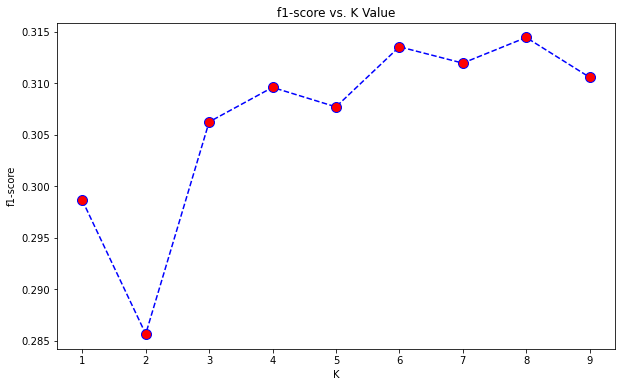

In [203]:
error_rate = []

for i in range(1,10):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_val)
    error_rate.append(f1_score(y_val, pred_i))


#將k=1~60的錯誤率製圖畫出。k=7之後，錯誤率就往上跑，
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('f1-score vs. K Value')
plt.xlabel('K')
plt.ylabel('f1-score')

#### Maybe I should set k as 10 ?

In [245]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_val)

In [246]:
print('Accuracy: %f' % accuracy_score(y_val, y_pred_knn))
print('f1-score: %f' % f1_score(y_val, y_pred_knn))

Accuracy: 0.725338
f1-score: 0.323241


## Craete Ans 

In [247]:
ans_pred = knn.predict(x_test)
df_sap = pd.DataFrame(ans_pred.astype(int), columns = ['Weather'])
df_sap.to_csv('myAns.csv',  index_label = 'Id')

## SVM

### Preprocessing

In [270]:
train_end_id = len(train_df)
df = pd.concat([train_df, df_test ], sort=False)

#### Drop some columns & Inputation

In [271]:
#from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Loc'] = df['Loc'].astype(str)
df['WindDir']= df['WindDir'].astype(str)
df['DayWindDir'] = df['DayWindDir'].astype(str)
df['NightWindDir'] = df['NightWindDir'].astype(str)

df['Loc'] = labelencoder.fit_transform(df['Loc'])
#df['WindDir'] = labelencoder.fit_transform(df['WindDir'])
#df['DayWindDir'] = labelencoder.fit_transform(df['DayWindDir'])
#df['NightWindDir'] = labelencoder.fit_transform(df['NightWindDir'])

In [272]:
df = df.drop(columns = [col for col in df.columns if df[col].dtype == np.object])
# drop
df = df.fillna(df.mean())

In [273]:
len(df.dtypes)

18

In [274]:
#from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(df.drop(columns = ['Weather']).values[:train_end_id, :],df['Weather'].values[:train_end_id], test_size=0.5)

In [275]:
from imblearn.over_sampling import SMOTE
sampler = SMOTE(random_state=42)
x_train, y_train = sampler.fit_resample(x_train, y_train)

In [276]:
x_test = df.drop(columns = ['Weather']).values[train_end_id:,:]

In [277]:
from sklearn.svm import SVC

In [282]:
svclassifier = SVC(kernel='linear')

In [283]:
svclassifier.fit(x_train, y_train)

SVC(kernel='linear')

In [284]:
y_pred_svm = svclassifier.predict(x_val)

In [285]:
print('Accuracy: %f' % accuracy_score(y_val, y_pred_knn))
print('f1-score: %f' % f1_score(y_val, y_pred_knn))

Accuracy: 0.656275
f1-score: 0.151404


## Craete Ans 

In [247]:
ans_pred = knn.predict(x_test)
df_sap = pd.DataFrame(ans_pred.astype(int), columns = ['Weather'])
df_sap.to_csv('myAns.csv',  index_label = 'Id')

## Logistic Regression ?